##**$\underline{PROSTATE  \; CANCER \; PROJECT}$**



#*IT Implementation*


Import of Modules :

In [ ]:
from IPython.display import HTML

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

Parameters :

In [ ]:
# list of absolutly random global parameters (for the while)
# just to see if our code runs


# random global parameter

Nx = 40 # mm 
Ny = 40 # mm

Lx = 1
Ly = 1

K0 =1

dt = 10**(-2)

dx = Lx/Nx
dy = Ly/Ny
s_x = dt/(dx**2)
s_y = dt/(dy*dy)

#1 - 
d_H = 10**(-3)
d_I = 10**(-3)
d_D = 10**(-3)
K_A  = 15. 
K_I = 25.00
K_H  = 0.500

"""
#2 
d_H = 10**(-5)
d_I = 10**(-2)
d_D = 10**(-5)
K_A  = 0
K_I = 100
K_H  = 0

#3 - test
d_H = 10**(-3)
d_I = 10**(-3)
d_D = 10**(-3)
K_A  = 0.5
K_I = 0.5
K_H  = 0.5
"""
# mutation :
K_AI = 0.15

# apoptosis  : 

mu = 10**(-2)

Initialisation :

In [ ]:
# Initialization at t = 0 
x_min_AD =12
x_max_AD = 20
y_min_AD = 16 #modified old 22
y_max_AD = 28

x_min_AI = 16 #modified old 20
x_max_AI = 28
y_min_AI =12 
y_max_AI = 18

AD_old = np.zeros((Nx,Ny))
AI_old = np.zeros((Nx,Ny))
H_old = K0*(1/3)*np.ones((Nx,Ny))
D_old = np.zeros((Nx,Ny)) 


AD_old[y_min_AD : y_max_AD + 1 , x_min_AD : x_max_AD+1] = K0*(1/3)
AI_old[y_min_AI : y_max_AI + 1 , x_min_AI : x_max_AI+1] = K0
H_old[y_min_AD : y_max_AD + 1 , x_min_AD : x_max_AD+1] = 0
H_old[y_min_AI : y_max_AI + 1 , x_min_AI : x_max_AI+1] = 0

D_old = K0*np.ones((Nx,Ny)) - (H_old + AI_old + AI_old)

Finite difference method (simplified equations) :

In [ ]:
def simplify (n):
    one = np.ones((Nx,Ny))

    AD_old_buffer = AD_old.copy()
    AI_old_buffer = AI_old.copy()
    H_old_buffer = H_old.copy()
  
    
    AD_forward = np.zeros((Nx,Ny))
    AI_forward = np.zeros((Nx,Ny))
    H_forward = np.zeros((Nx,Ny))
    D_forward = np.zeros((Nx,Ny))

    #List of matrix AD, AI, H & D
    List = [[AD_old],[AI_old],[H_old],[D_old]]

    # Bounds : 
        
    AD_forward[0, : ] = 0 # gamma top
    AD_forward[1:,0] = 0  # gamma left
    AD_forward[Nx-1,1:] = 0# gamma bottom 
    AD_forward[1:-1,Ny-1] = 0# gamma right
        
    AI_forward[0, : ] = 0 # gamma top 
    AI_forward[1:,0] =0 # gamma left
    AI_forward[Nx-1,1:] = 0 # gamma bottom
    AI_forward[1:-1,Ny-1] = 0 # gamma right 
        
    H_forward[0, : ] = 1 # gamma top 
    H_forward[1:,0] =1# gamma left
    H_forward[Nx-1,1:] = 1 # gamma bottom
    H_forward[1:-1,Ny-1] = 1# gamma right 
    
    for t in range (n) : 
            
        # Forward Euler on H :
        H_forward[1 : -1 , 1 : -1] = dt*K_H*H_old_buffer[1:-1 , 1:-1]*(one[1:-1 , 1:-1]-np.divide(H_old_buffer[1:-1 , 1:-1] + AI_old_buffer[1:-1,1:-1] +AD_old_buffer[1:-1,1:-1], K0))
        H_forward[1 : -1 , 1 : -1] += (H_old_buffer[:-2 , 1:-1] -2*H_old_buffer[1:-1 , 1:-1] +H_old_buffer[2: , 1 :-1])*s_x*d_H
        H_forward[1 : -1 , 1 : -1] += (H_old_buffer[1:-1 ,:-2] -2*H_old_buffer[1:-1 , 1:-1] +H_old_buffer[1:-1 , 2:])*s_y*d_H
        H_forward[1 : -1 , 1 : -1] += H_old_buffer[1:-1 , 1:-1]
        H_forward[1 : -1 , 1 : -1] -= dt*mu*H_old_buffer[1:-1 , 1:-1] 
        
        
        # Forward Euler on AD : 
        AD_forward[1 : -1 , 1 : -1] = dt*K_A*AD_old_buffer[1:-1 , 1:-1]*(one[1:-1 , 1:-1]-np.divide(AD_old_buffer[1:-1 , 1:-1] + AI_old_buffer[1:-1,1:-1]+H_old_buffer[1:-1,1:-1], K0))
        AD_forward[1 : -1 , 1 : -1] += (AD_old_buffer[:-2 , 1:-1] -2*AD_old_buffer[1:-1 , 1:-1] +AD_old_buffer[2: , 1 :-1])*s_x*d_D
        AD_forward[1 : -1 , 1 : -1] += (AD_old_buffer[1:-1 ,:-2] -2*AD_old_buffer[1:-1 , 1:-1] +AD_old_buffer[1:-1 , 2:])*s_y*d_D
        AD_forward[1 : -1 , 1 : -1] += AD_old_buffer[1:-1 , 1:-1]
        AD_forward[1 : -1 , 1 : -1] -= (K_AI + mu)*dt*AD_old_buffer[1:-1 , 1:-1]
        

        # Forward Euler :
        AI_forward[1 : -1 , 1 : -1] = dt*K_I*AI_old_buffer[1:-1 , 1:-1]*(one[1:-1 , 1:-1]-np.divide(AI_old_buffer[1:-1 , 1:-1] + AD_old_buffer[1:-1,1:-1]+H_old_buffer[1:-1,1:-1] , K0))
        AI_forward[1 : -1 , 1 : -1] += (AI_old_buffer[:-2 , 1:-1] -2*AI_old_buffer[1:-1 , 1:-1] +AI_old_buffer[2: , 1 :-1])*s_x*d_I
        AI_forward[1 : -1 , 1 : -1] += (AI_old_buffer[1:-1 ,:-2] -2*AI_old_buffer[1:-1 , 1:-1] +AI_old_buffer[1:-1 , 2:])*s_y*d_I
        AI_forward[1 : -1 , 1 : -1] += AI_old_buffer[1:-1 , 1:-1]
        AI_forward[1 : -1 , 1 : -1] += dt*K_AI*AD_old_buffer[1:-1 , 1:-1] - mu*dt*AI_old_buffer[1:-1 , 1:-1]
        

        # Matrix of dead cell
        D_forward[1 : -1 , 1 : -1] = K0*one[1 : -1 , 1 : -1] - AI_forward[1 : -1 , 1 : -1] - AD_forward[1 : -1 , 1 : -1] - H_forward[1 : -1 , 1 : -1]
      

        # update 
        AD_old_buffer =AD_forward.copy()
        AI_old_buffer =AI_forward.copy()
        H_old_buffer =H_forward.copy()
        D_forward = D_forward.copy()


        List[0].append(AD_old_buffer) , List[1].append(AI_old_buffer) , List[2].append(H_old_buffer), List[3].append(D_forward)
        
    return List


Display (mp4 format) :


 Black color corresponds to a strong presence of this type of cell.



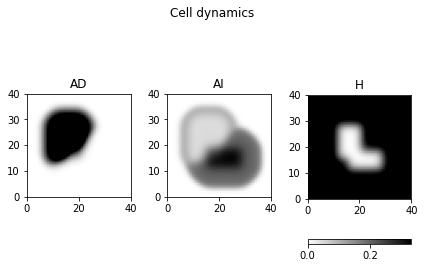

In [ ]:
n = 100 #Number of iteration

data = simplify(n)


####### Graph #######

fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.set_xlim((0, Nx))
ax1.set_ylim((0, Ny))

ax2.set_xlim((0, Nx))
ax2.set_ylim((0, Ny))

ax3.set_xlim((0, Nx))
ax3.set_ylim((0, Ny))

im1 = ax1.imshow(AD_old,cmap = 'gray_r')
im2 = ax2.imshow(AI_old,cmap = 'gray_r')
im3 = ax3.imshow(H_old,cmap = 'gray_r')

#Initialization
def init():
    im1.set_data(AD_old)
    im2.set_data(AI_old)
    im3.set_data(H_old)
    return (im1,im2,im3,)

# animation function. 
def animate(i):
    im1.set_data(data[0][i])
    im2.set_data(data[1][i])
    im3.set_data(data[2][i])
    return (im1,im2,im3,)

# call the animator
fig.suptitle('Cell dynamics')
ax1.set_title("AD")
ax2.set_title("AI")
ax3.set_title("H")
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=100, blit=True)

fig.tight_layout() #spacing subplot 
plt.colorbar(im1, orientation="horizontal" , pad = 0.15) 
print("\n Black color corresponds to a strong presence of this type of cell.\n")

HTML(anim.to_html5_video())


 Density of dead cells (with a different scale of value) : The darker the region, the more dead cells there are.



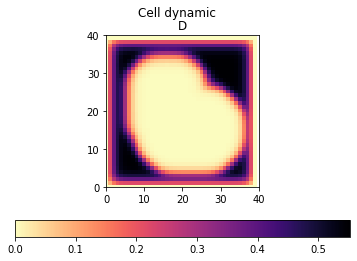

In [ ]:
fig2, ax4 = plt.subplots(1,1)

ax4.set_xlim((0, Nx))
ax4.set_ylim((0, Ny))

m0 , m1 = np.min(data[3][n]) , np.max(data[3][n])
im4 = ax4.imshow(data[3][1], cmap = "magma_r",vmin=0,vmax=m1)


def init2():
  im4.set_data(data[3][0])
  return (im4,)

def animate2(i):
  im4.set_data(data[3][i])
  return (im4,)

fig2.suptitle('Cell dynamic')
ax4.set_title("D")
plt.colorbar(im4, orientation="horizontal" , pad = 0.15) 
print("\n Density of dead cells (with a different scale of value) : The darker the region, the more dead cells there are.\n") 

anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2,
                               frames=n, interval=100, blit=True)
HTML(anim2.to_html5_video())



---



---







#*Mathematical Part*







**Fist model**




$\underline{Simplification \; of \; the \; equation } (1)$  : 

$(1) \iff \frac{\partial A_D}{\partial t} + \nabla . ( bA_D- \nabla(d_D A_D)) =  K_{A_D}(A) A_D(1-\frac{A_D+A_I+H}{K_0} ) - K_{A_{DI}}(A) A_D - \mu_0A_D$


Let $(1BIS) $ : the simplification of $(1)$

$(1BIS) \iff \frac{\partial A_D}{\partial t} - d_D \Delta(A_D)) =  K_{A_D}(A) A_D(1-\frac{A_D+A_I+H}{K_0} ) $ 


Thanks to Taylor's development , we can write : 

* $ \frac{\partial A_D}{\partial t} \simeq \frac{(A_D)^{(n)}_{ij} -(A_D)^{(n-1)}_{ij} }{\Delta t } $ 

* $ \Delta A_D \simeq \frac{(A_D)^{(n-1)}_{i+1,j} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i-1,j} } { (\Delta x)^2 }  +  \frac{(A_D)^{(n-1)}_{i,j+1} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i,j-1} } { (\Delta y)^2 } $ 

moreover : 

* $ K_{A_D}(A) A_D(1-\frac{A_D+A_I+H}{K_0} ) \simeq K_{A_D}(A) (A_D)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+(A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) $ 


So finally we have  : 

$ (1BIS) \iff  (A_D)^{(n)}_{ij} \simeq \Delta t .  K_{A_D}(A) (A_D)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+(A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} )  +\frac{(A_D)^{(n-1)}_{i+1,j} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i-1,j} } { (\Delta x)^2 }. \Delta t.d_D + \frac{(A_D)^{(n-1)}_{i,j+1} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i,j-1} } { (\Delta y)^2 } . \Delta t.d_D $ 

if we let $ \sigma_x = \frac{\Delta t }{(\Delta x)^2} $ and $\sigma_y = \frac{\Delta t }{(\Delta y)^2} $  : 

$ (1BIS) \iff  (A_D)^{(n)}_{ij}\simeq \Delta t .  K_{A_D}(A) (A_D)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) +[(A_D)^{(n-1)}_{i+1,j} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i-1,j} ] \sigma_x.d_D + [(A_D)^{(n-1)}_{i,j+1} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i,j-1}  ] \sigma_y.d_D  + (A_D)^{(n-1)}_{ij}  $ 


In the same way that we found $(1BIS)$ , we are going to simplify the equations $(2) $ and $(3)$ in respectively $(2BIS)$ and $(3BIS)$ 

$(2) \iff \frac{\partial A_I}{\partial t} + \nabla . ( bA_I- \nabla(d_I A_I)) =  K_{A_I}(A) A_I(1-\frac{A_D+A_I+H}{K_0} ) + K_{A_{DI}}(A) A_D - \mu_0A_I$

$(3) \iff \frac{\partial H}{\partial t} + \nabla . ( bH- \nabla(d_H H)) =  K_{H}H(1-\frac{A_D+A_I+H}{K_0} )  - \mu_0H$

$\underline{Simplification \; of \; the \; equation } $ $(2)$  :

$ (2BIS) \iff  (A_I)^{(n)}_{ij}\simeq \Delta t .  K_{A_I}(A) (A_I)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) +[(A_I)^{(n-1)}_{i+1,j} -2(A_I)^{(n-1)}_{ij} +(A_I)^{(n-1)}_{i-1,j} ] \sigma_x.d_I + [(A_I)^{(n-1)}_{i,j+1} -2(A_I)^{(n-1)}_{ij} +(A_I)^{(n-1)}_{i,j-1}  ] \sigma_y.d_I  + (A_I)^{(n-1)}_{ij}  $ 

$\underline{Simplification \; of \; the \; equation } $ $(3)$  :


$ (3BIS) \iff  (H)^{(n)}_{ij}\simeq \Delta t .  K_{H}H^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) +[H^{(n-1)}_{i+1,j} -2H^{(n-1)}_{ij} +H^{(n-1)}_{i-1,j} ] \sigma_x.d_H + [H^{(n-1)}_{i,j+1} -2H^{(n-1)}_{ij} +H^{(n-1)}_{i,j-1}  ] \sigma_y.d_H  + H^{(n-1)}_{ij}  $ 







**Second model**




$\underline{Addition \; of \; mutation \; terms \;  from\;  A_D \; to\;  A_I \; and \; apoptosis\;  of\;  A_D , \; A_I\;  and\;  H : } $

- $(1TER) \iff (A_D)^{(n)}_{ij}\simeq \Delta t .  K_{A_D}(A) (A_D)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) +[(A_D)^{(n-1)}_{i+1,j} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i-1,j} ] \sigma_x.d_D + [(A_D)^{(n-1)}_{i,j+1} -2(A_D)^{(n-1)}_{ij} +(A_D)^{(n-1)}_{i,j-1}  ] \sigma_y.d_D  + (A_D)^{(n-1)}_{ij}  - K_{A_{DI}}(A)(A_D)^{(n-1)}_{i,j} - \mu_0(A_D)^{(n-1)}_{i,j} $ 

- $ (2TER) \iff  (A_I)^{(n)}_{ij}\simeq \Delta t.K_{A_I}(A) (A_I)^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} )+[(A_I)^{(n-1)}_{i+1,j} -2(A_I)^{(n-1)}_{ij} +(A_I)^{(n-1)}_{i-1,j} ] \sigma_x.d_I + [(A_I)^{(n-1)}_{i,j+1} -2(A_I)^{(n-1)}_{ij} +(A_I)^{(n-1)}_{i,j-1}  ] \sigma_y.d_I  + (A_I)^{(n-1)}_{ij} + K_{A_{DI}}(A)(A_D)^{(n-1)}_{i,j} - \mu_0(A_I)^{(n-1)}_{i,j} $ 

- $ (3TER) \iff  (H)^{(n)}_{ij}\simeq \Delta t .  K_{H}H^{(n-1)}_{i,j} (1-\frac{(A_D)^{(n-1)}_{i,j}+ (A_I)^{(n-1)}_{i,j}+H^{(n-1)}_{i,j}}{K_0} ) +[H^{(n-1)}_{i+1,j} -2H^{(n-1)}_{ij} +H^{(n-1)}_{i-1,j} ] \sigma_x.d_H + [H^{(n-1)}_{i,j+1} -2H^{(n-1)}_{ij} +H^{(n-1)}_{i,j-1}  ] \sigma_y.d_H  + H^{(n-1)}_{ij} - \mu_0(H)^{(n-1)}_{i,j}  $ 
